In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import APL1_functions as AC


In [3]:
df = AC.data_loader("\\alpha5e-4\\python_driver\\SIM00000728\\structure_disk.outputdat")

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)


In [4]:
alpha = ['5e-4', '1e-4', '5e-3', '1e-3']
sim_numbers = range(1, 1001)   


In [5]:

file_paths = []

for ii in alpha:
    for jj in sim_numbers:
        sim_str = str(jj).zfill(4)  
        file_path = f"\\alpha{ii}\\python_driver\\SIM0000{sim_str}\\structure_disk.outputdat"
        file_paths.append(file_path)

In [6]:

file_paths_alpha_5e_minus_4 = file_paths[0:1000]
file_paths_alpha_1e_minus_4 = file_paths[1001:2000]
file_paths_alpha_5e_minus_3 = file_paths[2001:3000]
file_paths_alpha_1e_minus_3 = file_paths[3001:4000]




In [7]:
df = AC.data_loader(file_paths_alpha_5e_minus_4[0])
new_df = df[df.iloc[:, 9] == 0]

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)


In [11]:
cell_number = new_df[0]
disk_radius = new_df[1]
aspect_ratio = new_df[3]
time = new_df[9]

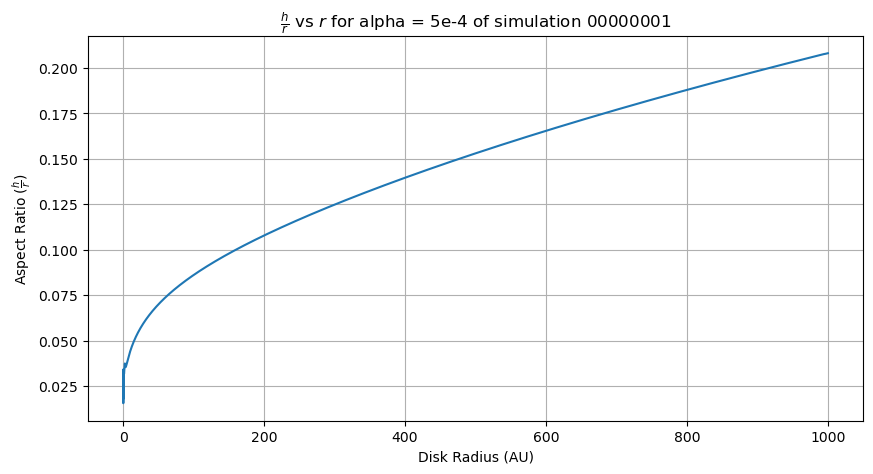

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(disk_radius, aspect_ratio)
plt.xlabel('Disk Radius (AU)')
plt.ylabel(r'Aspect Ratio ($\frac{h}{r}$)')
plt.title(r'$\frac{h}{r}$ vs $r$ for alpha = ' + str(alpha[0]) + ' of simulation 0000' + str(sim_str[0].zfill(4)))
plt.grid()

In [35]:
dfs_alpha_5e_minus_4 = []
for ii in range(len(file_paths_alpha_5e_minus_4)):
    df = AC.data_loader(file_paths_alpha_5e_minus_4[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_5e_minus_4.append(new_df)

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\

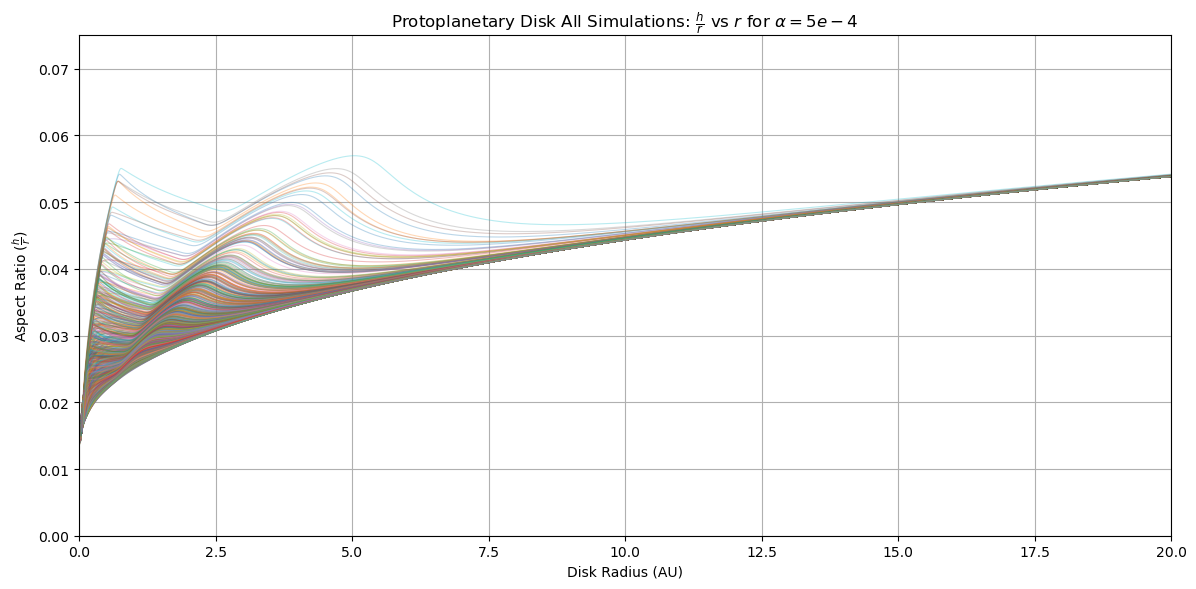

In [42]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_5e_minus_4:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"Protoplanetary Disk All Simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[0]) + "$")
plt.grid()
plt.tight_layout()
plt.xlim(0, 20)
plt.ylim(0,.075)
plt.show()

In [ ]:
dfs_alpha_1e_minus_4 = []
for ii in range(len(file_paths_alpha_1e_minus_4)):
    df = AC.data_loader(file_paths_alpha_1e_minus_4[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_1e_minus_4.append(new_df)

In [ ]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_1e_minus_4:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[1]) + "$")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
dfs_alpha_5e_minus_3 = []
for ii in range(len(file_paths_alpha_5e_minus_3)):
    df = AC.data_loader(file_paths_alpha_5e_minus_3[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_5e_minus_3.append(new_df)

In [ ]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_5e_minus_3:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[2]) + "$")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
dfs_alpha_1e_minus_3 = []
for ii in range(len(file_paths_alpha_1e_minus_3)):
    df = AC.data_loader(file_paths_alpha_1e_minus_3[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_1e_minus_3.append(new_df)

In [ ]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_1e_minus_3:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[3]) + "$")
plt.grid()
plt.tight_layout()
plt.show()